### Hongk Kong Protests - 香港

In [1]:
# Dependencies
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

In [2]:
# FreeHongKong and HongKongProtest
# 反送中
df = pd.read_json("new.json", encoding='utf-8')

In [3]:
#Gross Domestic Product
# 本地生產總值
gdp_df = pd.read_csv("gdp.csv")

In [4]:
#Visitor Arrivals 
# 訪港旅客
arrivals_df = pd.read_csv("VisitorArrivals.csv")

In [5]:
# Investment expenditure (Gross domestic fixed capital formation)
# 投資開支 (本地固定資本形成總額)

ie_df = pd.read_csv("InvestmentExpenditure.csv")

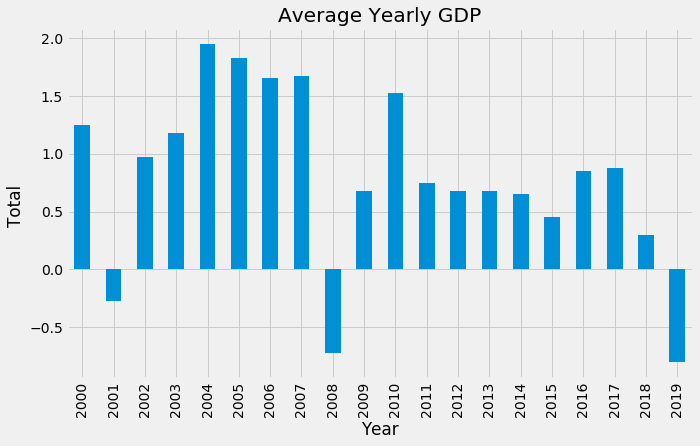

In [6]:
plt.style.use("fivethirtyeight")
gdp = gdp_df.groupby(['Year'])['Seasonally adjusted quarter-to-quarter growth rate'].mean()
ax = gdp.plot.bar(figsize=(10,6), title="Average Yearly GDP")
label = plt.ylabel("Total ")
plt.show()

# Save Figure
# plt.savefig("x.png")

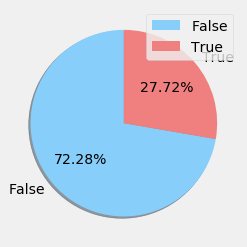

In [7]:
#Percentage of tweets that have media
media = df["has_media"].value_counts()
colors=["lightskyblue", "lightcoral"]
# explode=(0,0,0.1)
plt.pie(media, labels=media.index, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis=("equal")
plt.legend(loc="upper right")


# Save Figure
# plt.savefig("x.png")

#Show Plot
plt.show()

In [8]:
# date_df = df["timestamp"]=pd.to_datetime(df["timestamp"])
# # df = df.set_index("timestamp")
# # df.drop(["date"], axis=1, inplace=True)
# # df.head()

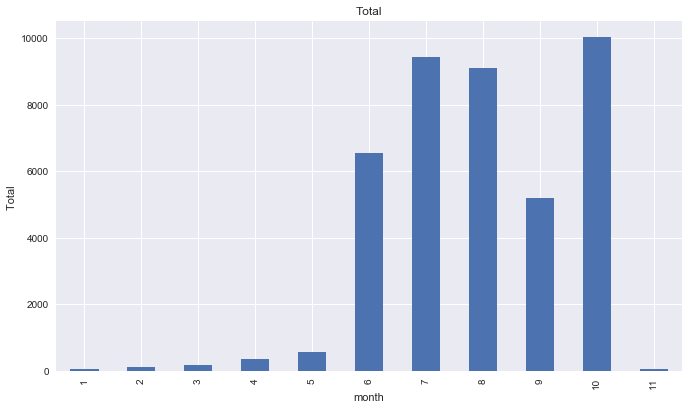

In [9]:
plt.style.use("seaborn")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].map(lambda x: x.month)
monthly = df.groupby(['month'])['likes'].count()
ax = monthly.plot.bar(figsize=(10,6), title="Total")
label = plt.ylabel("Total ")
plt.show()

# Save Figure
# plt.savefig("x.png")

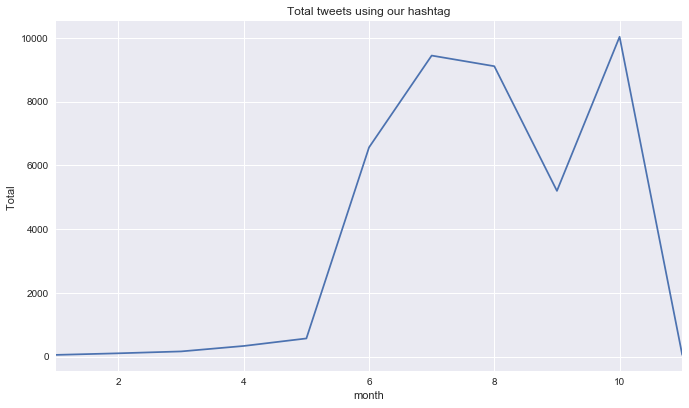

In [10]:
plt.style.use("seaborn")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].map(lambda x: x.month)
monthly = df.groupby(['month'])['likes'].count()
ax = monthly.plot.line(figsize=(10,6), title="Total tweets using our hashtag")
label = plt.ylabel("Total ")
plt.show()

# Save Figure
# plt.savefig("x.png")

# Scikit-Learn

In [11]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
#Total hastags used per month and GDP or arrivals

In [13]:
df.describe(include=['object', 'bool'])

,has_media,hashtags,img_urls,is_replied,is_reply_to,links,parent_tweet_id,reply_to_users,screen_name,text,text_html,tweet_url,username,video_url
count,41629,41629,41629,41629,41629,41629,41629,41629,41629,41629,41629,41629,41629,41629
unique,2,22546,11421,2,2,15279,3738,3096,17281,40383,40527,41274,16709,1
top,False,[FreeHongKong],[],False,False,[],,[],ogkeyser,#FreeHongKong,"<p class=""TweetTextSize js-tweet-text tweet-te...",/phil__knows/status/1160301996018163716,TheResistance.Blog,
freq,30089,2622,30089,36346,35612,17692,35612,35617,878,307,306,2,878,41629


In [14]:
# merging hastag dataframe with gdp dataframe
# pop_merged_df = states_df.merge(pop, left_on='state', right_on='state')
# pop_merged_df.head()

In [16]:
#Add months column to dateframe to do more analysis
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]).month

In [37]:
tweet_count = df['timestamp'].value_counts()
tweet_count = pd.DataFrame(tweet_count)
tweet_count = tweet_count.rename(columns={'timestamp':'Tweets'})
tweet_count = tweet_count.rename_axis('Month')
tweet_count.head()

,Tweets
Month,
10,10033
7,9444
8,9110
6,6563
9,5199


In [35]:
combined_df = arrivals_df.merge(tweet_count, on='Month')
combined_df.head(20)

,Year,Month,Number,Year-on-year % change,Tweets
0,2019,1,6784406,27.2,54
1,2019,2,5589628,5.8,104
2,2019,3,5860346,17.3,163
3,2019,4,5577201,5.2,334
4,2019,5,5916541,19.5,570
5,2019,6,5143734,8.5,6563
6,2019,7,5196969,-4.8,9444
7,2019,8,3590571,-39.1,9110
8,2019,9,3104049,-34.2,5199


<function matplotlib.pyplot.show(*args, **kw)>

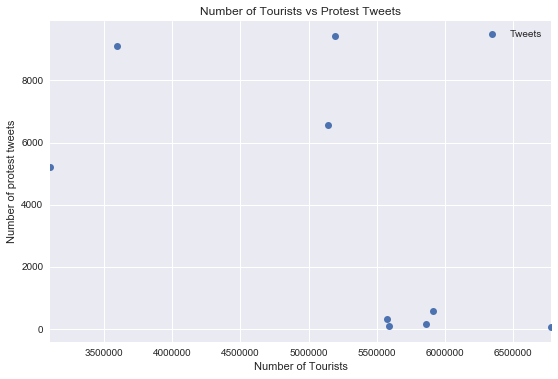

In [39]:
combined_df.plot(x='Number', y='Tweets', style='o')
plt.title('Number of Tourists vs Protest Tweets')
plt.xlabel('Number of Tourists')
plt.ylabel('Number of protest tweets')
plt.show

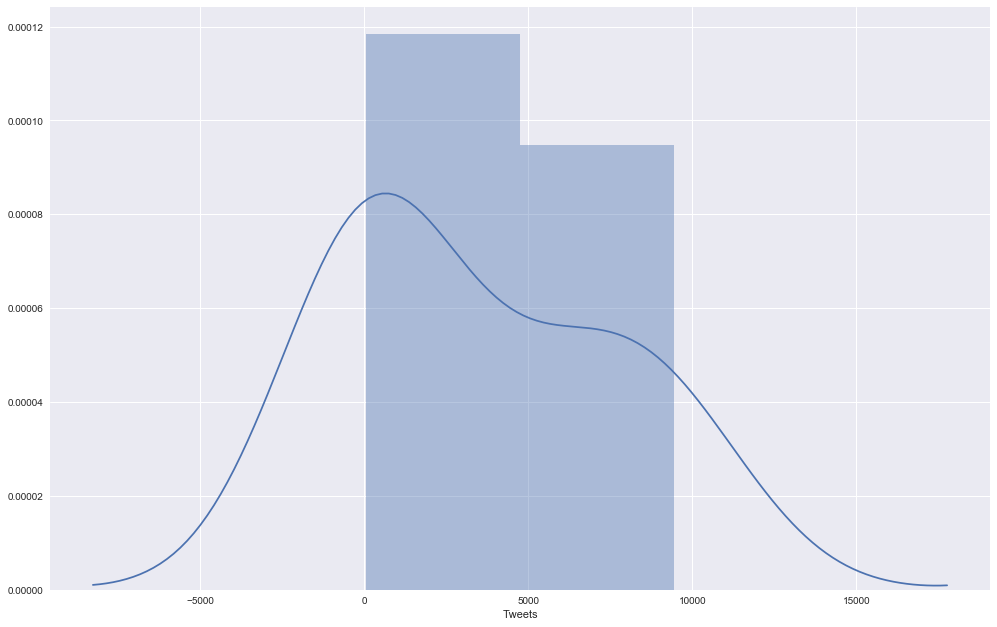

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(combined_df['Tweets'])

In [21]:
X = combined_df['Number'].values.reshape(-1,1)
y = combined_df['Tweets'].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#Get the intercept:
print(regressor.intercept_)
#Get the slope:
print(regressor.coef_)

[12681.73014752]
[[-0.00178235]]


In [25]:
y_pred = regressor.predict(X_test)


In [26]:
r_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
r_df

,Actual,Predicted
0,9110,6282.063728
1,163,2236.522547


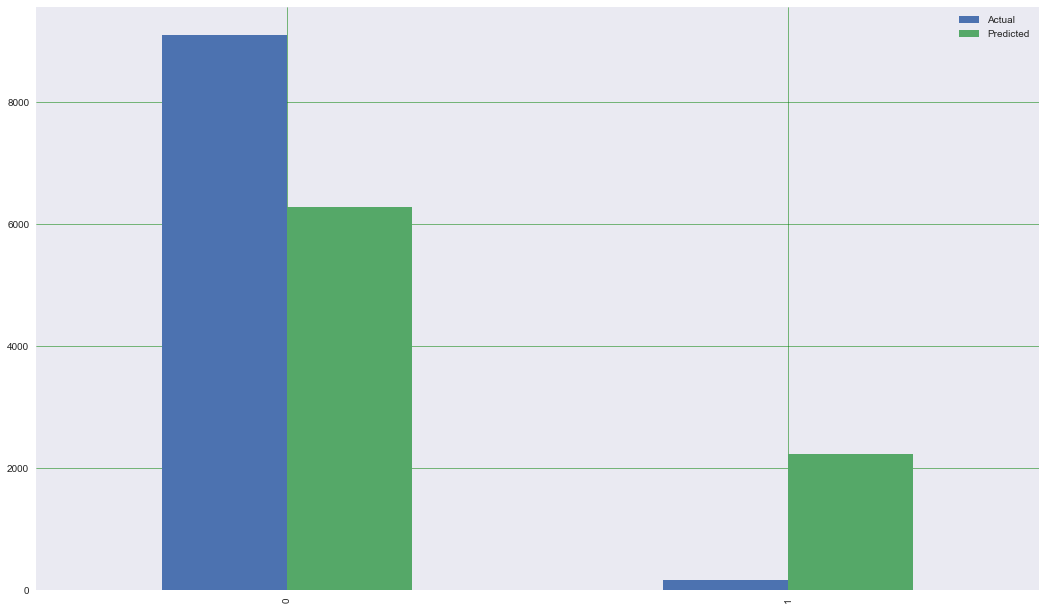

In [40]:
df1 = r_df.head(12)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


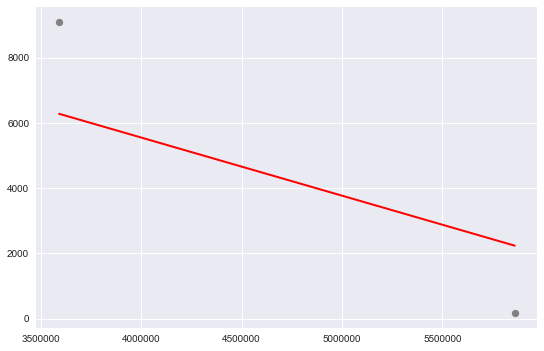

In [41]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2450.729409126087
Mean Squared Error: 6148359.653862944
Root Mean Squared Error: 2479.588605769704
